In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

In [2]:
data = pd.read_csv("data/daily-inmates-in-custody.csv")
data.sample(5)

,INMATEID,ADMITTED_DT,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION
1641,20192860,2018-03-10T13:13:44,NaN,MIN,N,B,M,40.0,DE,N,N,170.25,N
4660,20014227,2018-01-19T01:41:44,NaN,MAX,N,O,M,38.0,DE,N,N,125.20,Y
2792,20131497,2018-04-23T20:57:58,NaN,NaN,N,B,F,22.0,DE,N,N,NaN,N
3781,20064737,2017-05-17T02:52:25,NaN,MIN,Y,W,M,50.0,DPV,N,N,NaN,Y
3595,20089592,2017-01-05T17:16:00,NaN,MAX,Y,O,M,24.0,DE,N,N,160.15,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8303 entries, 0 to 8302
Data columns (total 13 columns):
INMATEID              8303 non-null int64
ADMITTED_DT           8303 non-null object
DISCHARGED_DT         0 non-null float64
CUSTODY_LEVEL         8116 non-null object
BRADH                 8303 non-null object
RACE                  8284 non-null object
GENDER                8284 non-null object
AGE                   8292 non-null float64
INMATE_STATUS_CODE    8303 non-null object
SEALED                8303 non-null object
SRG_FLG               8303 non-null object
TOP_CHARGE            7261 non-null object
INFRACTION            8303 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 843.4+ KB


/Users/sw/.venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


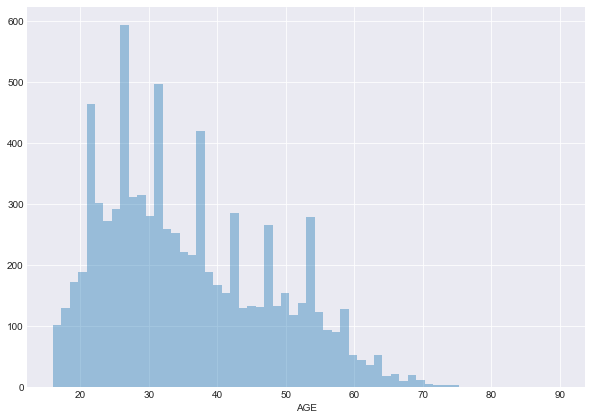

In [13]:
plt.figure(figsize=(10,7))
sns.distplot(pd.to_numeric(data.AGE).dropna(), kde=False, label="Age", bins=60)

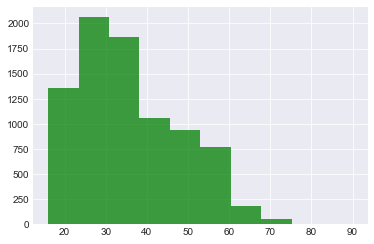

In [18]:
h = plt.hist(pd.to_numeric(data.AGE).dropna(), facecolor='g', alpha=0.75)